# Evaluating Turbulence and Systematic Risk of Financial Markets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

## 1. Fetch data (returns of all assets over entire history)

### Historical data

#### Australian Dollar

In [2]:
aud = yf.Ticker("AUDUSD=X")

# aud.info
aud_history = aud.history(period='10y', interval='1wk')
aud_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-14,0.982801,0.985416,0.981932,0.982898,0,0,0
2012-05-21,0.983768,0.993937,0.970685,0.982318,0,0,0
2012-05-28,0.981547,0.989903,0.958497,0.965997,0,0,0
2012-06-04,0.964599,1.000300,0.963206,0.998403,0,0,0
2012-06-11,0.998403,1.013366,0.986777,1.011225,0,0,0
...,...,...,...,...,...,...,...
2022-04-25,0.723694,0.723338,0.705570,0.710884,0,0,0
2022-05-02,0.706539,0.726528,0.703408,0.712100,0,0,0
2022-05-09,0.704700,0.705189,0.684470,0.687191,0,0,0


/Users/tom/opt/miniconda3/envs/ThesisEnv/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


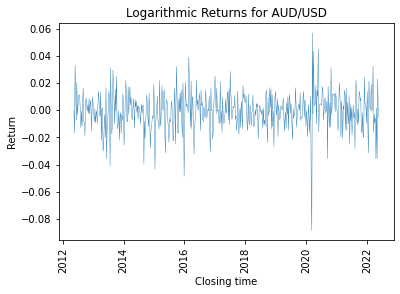

In [3]:
# computing/plotting returns
aud_log_returns = (np.log(aud_history.Close) - np.log(aud_history.Close.shift(1))).shift(-1)
aud_log_returns.dropna(inplace=True)

plt.plot(aud_log_returns, linewidth=0.4)
plt.xlabel('Closing time')
plt.ylabel('Return')
plt.title(f'Logarithmic Returns for AUD/USD')
plt.xticks(rotation=90)
plt.show()

#### US Dollar Index
USDX proportions:
- EUR = 57.6\%
- JPY = 13.6\%
- GBP = 11.9\%
- CAD = 9.1\%
- SEK = 4.2\%
- CHF = 3.6\%

In [4]:
def get_returns(assets, period='10y', interval='1wk'):
    returns_dict = {}

    for asset in assets:
        pair = f"{asset}USD=X"
        data = yf.Ticker(pair)
        history = data.history(period=period, interval=interval)

        log_returns = (np.log(history.Close) - np.log(history.Close.shift(1))).shift(-1)
        log_returns.dropna(inplace=True)

        returns_dict.update({asset: log_returns})

    return returns_dict


def plot_returns(keys, returns, shape):
    x, y = shape
    fig, ax = plt.subplots(x, y, figsize=(15, 13))

    for j in  range(y):
        for i in range(x):
            key = keys[x * j + i]
            ax[i, j].plot(returns[key], linewidth=0.4)
            ax[i, j].set(title=f'Logarithmic Returns for {key}/USD', xlabel=r'Closing time $t$', ylabel=r'Log-return $r$')

    plt.tight_layout()
    plt.show()

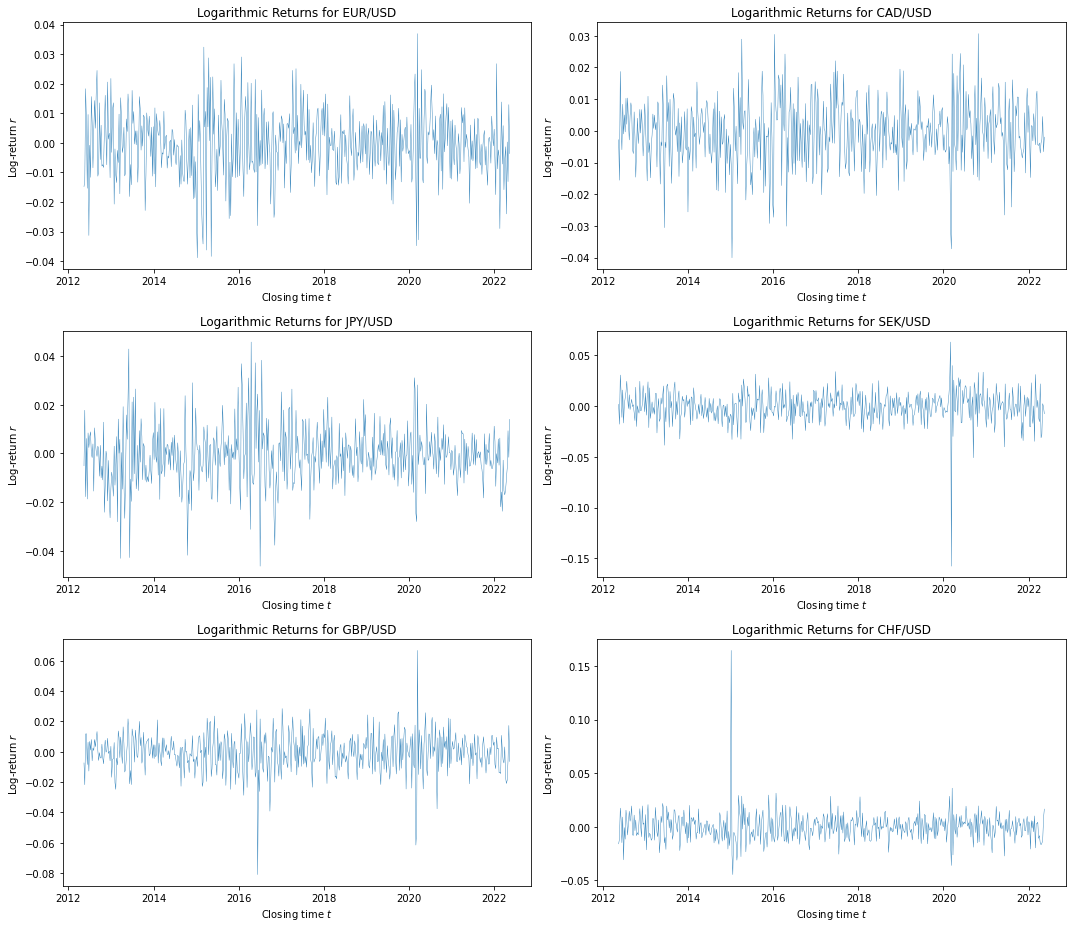

In [5]:
usdx_assets = [
    'EUR',
    'JPY',
    'GBP',
    'CAD',
    'SEK',
    'CHF',
]

usdx_returns = get_returns(usdx_assets)
plot_returns(usdx_assets, usdx_returns, shape=(3, 2))